# KNN

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Dataset - 1
### https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10086231/

In [2]:
data1 = pd.read_csv('./Dataframes/dataset1.csv')
data1

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
print(data1.dtypes)
data1 = data1.drop(['name'], axis = 1)
data1.head()

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
X = data1.drop(['status'], axis = 1)
y = data1['status']

scaler = StandardScaler()

X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_scaled, y_train)

y_pred1 = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test1, y_pred1)
print(f'Accuracy of the KNN Classifier1: {accuracy:.2f}')


Accuracy of the KNN Classifier1: 0.95


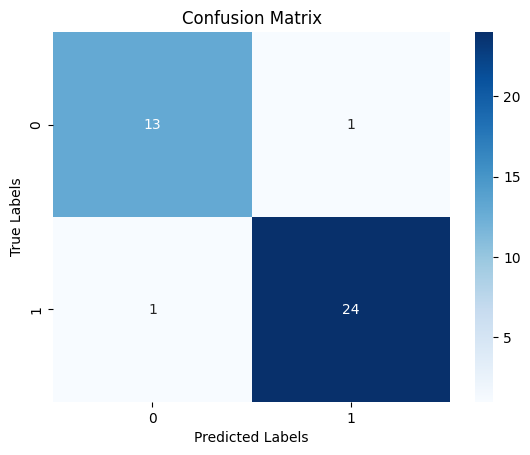

Confusion Matrix:
 [[13  1]
 [ 1 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.96      0.96      0.96        25

    accuracy                           0.95        39
   macro avg       0.94      0.94      0.94        39
weighted avg       0.95      0.95      0.95        39



In [5]:
# Assuming you have the predicted labels (y_pred) and true labels (y_test)
# Draw the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test1, y_pred1)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test1, y_pred1)
print("Classification Report:\n", class_report)

## Dataset - 2
### https://archive.ics.uci.edu/dataset/489/parkinson+dataset+with+replicated+acoustic+features

In [6]:
data2 = pd.read_csv('./Dataframes/dataset2.csv')
data2


,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,PARK-39,2,1,0,0.57585,0.000037,0.003701,0.005149,0.016868,0.14928,...,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144
236,PARK-39,3,1,0,0.23322,0.000015,0.001270,0.001497,0.017923,0.16720,...,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835
237,PARK-40,1,1,0,0.26862,0.000022,0.001354,0.001615,0.028040,0.24182,...,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409
238,PARK-40,2,1,0,0.45376,0.000037,0.002724,0.002258,0.064605,0.58002,...,1.327629,1.349928,1.461323,1.350599,1.346363,1.415338,1.361937,1.331923,1.423062,1.307353


In [7]:
print(data2.dtypes)
data2 = data2.drop(['ID'], axis = 1)
data2.head()
# data2.shape()

ID             object
Recording       int64
Status          int64
Gender          int64
Jitter_rel    float64
Jitter_abs    float64
Jitter_RAP    float64
Jitter_PPQ    float64
Shim_loc      float64
Shim_dB       float64
Shim_APQ3     float64
Shim_APQ5     float64
Shi_APQ11     float64
HNR05         float64
HNR15         float64
HNR25         float64
HNR35         float64
HNR38         float64
RPDE          float64
DFA           float64
PPE           float64
GNE           float64
MFCC0         float64
MFCC1         float64
MFCC2         float64
MFCC3         float64
MFCC4         float64
MFCC5         float64
MFCC6         float64
MFCC7         float64
MFCC8         float64
MFCC9         float64
MFCC10        float64
MFCC11        float64
MFCC12        float64
Delta0        float64
Delta1        float64
Delta2        float64
Delta3        float64
Delta4        float64
Delta5        float64
Delta6        float64
Delta7        float64
Delta8        float64
Delta9        float64
Delta10   

,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [8]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

scaler = StandardScaler()

X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNN_classifier = KNeighborsClassifier(n_neighbors=3)

KNN_classifier.fit(X_train_scaled, y_train)

y_pred2 = KNN_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test2, y_pred2)
print(f'Accuracy of the KNN Classifier: {accuracy:.2f}')

Accuracy of the KNN Classifier: 0.81


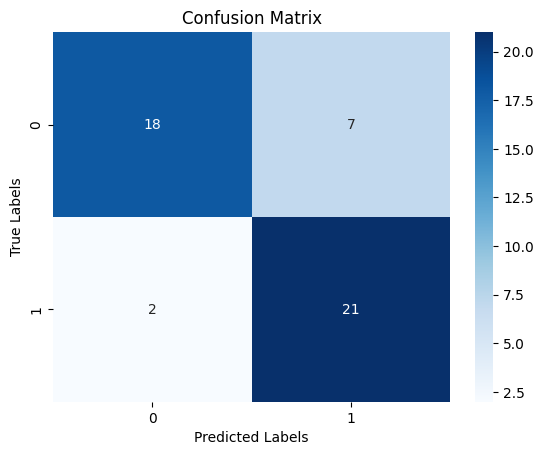

Confusion Matrix:
 [[18  7]
 [ 2 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.75      0.91      0.82        23

    accuracy                           0.81        48
   macro avg       0.82      0.82      0.81        48
weighted avg       0.83      0.81      0.81        48



In [9]:
# Assuming you have the predicted labels (y_pred) and true labels (y_test)
# Draw the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test2, y_pred2)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test2, y_pred2)
print("Classification Report:\n", class_report)

## Dataset - 3

### https://archive.ics.uci.edu/dataset/174/parkinsons

In [10]:
data3 = pd.read_csv('./Dataframes/dataset3.csv')
data3


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [11]:
print(data3.dtypes)
data3 = data3.drop(['subject#', 'test_time'], axis = 1)
data3.head()

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object


,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [12]:
# data3['total_UPDRS'] = pd.cut(data3['total_UPDRS'], bins = [0, 25, 50, 100], labels = [0, 1, 2])
# data3['motor_UPDRS'] = pd.cut(data3['motor_UPDRS'], bins = [0, 15, 30, 100], labels = [0, 1, 2])

total_UPDRS_threshold = 50
motor_UPDRS_threshold = 30

data3['status'] = ((data3['total_UPDRS'] >= total_UPDRS_threshold) | (data3['motor_UPDRS'] >= motor_UPDRS_threshold)).astype(int)

data3[data3['status'] == 1].count()

age              999
sex              999
motor_UPDRS      999
total_UPDRS      999
Jitter(%)        999
Jitter(Abs)      999
Jitter:RAP       999
Jitter:PPQ5      999
Jitter:DDP       999
Shimmer          999
Shimmer(dB)      999
Shimmer:APQ3     999
Shimmer:APQ5     999
Shimmer:APQ11    999
Shimmer:DDA      999
NHR              999
HNR              999
RPDE             999
DFA              999
PPE              999
status           999
dtype: int64

In [13]:
X = data3.drop(['total_UPDRS', 'motor_UPDRS', 'total_UPDRS'], axis = 1)
y = data3['status']

scaler = StandardScaler()

X_train, X_test, y_train, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNN_classifier = KNeighborsClassifier(n_neighbors=3)

KNN_classifier.fit(X_train_scaled, y_train)

y_pred3 = KNN_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test3, y_pred3)
print(f'Accuracy of the KNN Classifier: {accuracy:.2f}')
data3

Accuracy of the KNN Classifier: 1.00


,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,status
0,72,0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
1,72,0,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0
2,72,0,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0
3,72,0,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0
4,72,0,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,...,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,0
5871,61,0,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,...,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,0
5872,61,0,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,...,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,0
5873,61,0,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,...,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,0


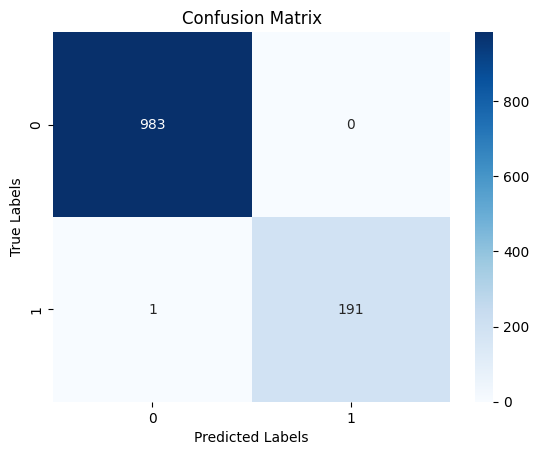

Confusion Matrix:
 [[983   0]
 [  1 191]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      0.99      1.00       192

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175



In [14]:
# Assuming you have the predicted labels (y_pred) and true labels (y_test)
# Draw the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test3, y_pred3)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test3, y_pred3)
print("Classification Report:\n", class_report)

## Dataset - 4
### https://archive.ics.uci.edu/dataset/301/parkinson+speech+dataset+with+multiple+types+of+sound+recordings

In [15]:
data4 = pd.read_csv('./Dataframes/dataset4.csv')
cols = ['subject_id', 'jitter_local', 'jitter_local_absolute', 'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer_local',
        'shimmer_local_db', 'shimmer_apq3', 'shimmer_apq5', 'shimmer_apq11', 'shimmer_dda', 'ac', 'nth', 'htn', 'median_pitch',
        'mean_pitch', 'standard_deviation', 'minimum_pitch', 'maximum_pitch', 'number_of_pulses', 'number_of_periods', 'mean_period',
        'standard_deviation_of_period', 'fraction_of_locally_unvoiced_frames', 'number_of_voice_breaks', 'degree_of_voice_breaks',
        'updrs', 'class_information']
data4.columns = cols
data4

,subject_id,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimmer_local_db,shimmer_apq3,shimmer_apq5,...,maximum_pitch,number_of_pulses,number_of_periods,mean_period,standard_deviation_of_period,fraction_of_locally_unvoiced_frames,number_of_voice_breaks,degree_of_voice_breaks,updrs,class_information
0,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1.0
1,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1.0
2,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1.0
3,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1.0
4,1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,158.591,63,60,0.007766,0.001066,24.194,2,15.113,1,0.0
1203,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,143.797,47,44,0.007561,0.000430,46.053,1,25.792,1,0.0
1204,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,149.641,79,77,0.007767,0.000881,20.000,1,4.574,1,0.0
1205,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,451.366,75,70,0.007257,0.001714,16.667,3,19.575,1,0.0


In [16]:
print(data4.dtypes)
data4 = data4.drop(['subject_id'], axis = 1)
data4.head()

subject_id                               int64
jitter_local                           float64
jitter_local_absolute                  float64
jitter_rap                             float64
jitter_ppq5                            float64
jitter_ddp                             float64
shimmer_local                          float64
shimmer_local_db                       float64
shimmer_apq3                           float64
shimmer_apq5                           float64
shimmer_apq11                          float64
shimmer_dda                            float64
ac                                     float64
nth                                    float64
htn                                    float64
median_pitch                           float64
mean_pitch                             float64
standard_deviation                     float64
minimum_pitch                          float64
maximum_pitch                          float64
number_of_pulses                         int64
number_of_per

,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimmer_local_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,...,maximum_pitch,number_of_pulses,number_of_periods,mean_period,standard_deviation_of_period,fraction_of_locally_unvoiced_frames,number_of_voice_breaks,degree_of_voice_breaks,updrs,class_information
0,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1.0
1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1.0
2,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1.0
3,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1.0
4,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,9.199,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1.0


In [17]:
data4.fillna(0, inplace = True) #Infered form a research paper based on the dataset
# data4.isnull().sum()

In [18]:
X = data4.drop(['class_information'], axis = 1)
y = data4['class_information']

scaler = StandardScaler()

X_train, X_test, y_train, y_test4 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNN_classifier = KNeighborsClassifier(n_neighbors=3)

KNN_classifier.fit(X_train_scaled, y_train)

y_pred4 = KNN_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test4, y_pred4)
print(f'Accuracy of the KNN Classifier: {accuracy:.2f}')

Accuracy of the KNN Classifier: 0.91


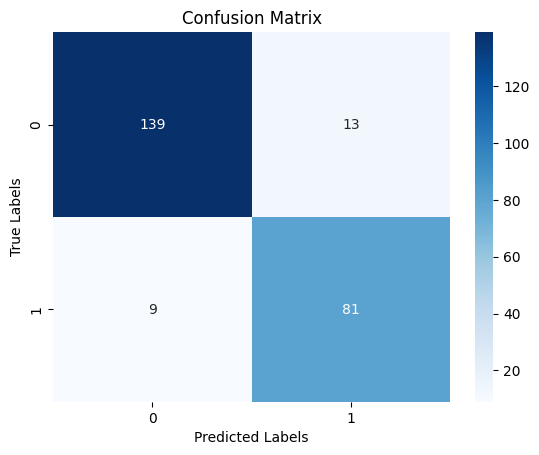

Confusion Matrix:
 [[139  13]
 [  9  81]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       152
         1.0       0.86      0.90      0.88        90

    accuracy                           0.91       242
   macro avg       0.90      0.91      0.90       242
weighted avg       0.91      0.91      0.91       242



In [19]:
# Assuming you have the predicted labels (y_pred) and true labels (y_test)
# Draw the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test4, y_pred4)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test4, y_pred4)
print("Classification Report:\n", class_report)

## Dataset - 5
### https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification

In [20]:
data5 = pd.read_csv('./Dataframes/dataset5.csv')
data5


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [21]:
print(data5.dtypes)
data5 = data5.drop(['id'], axis = 1)
data5.head()

id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [22]:
X = data5.drop(['class'], axis = 1)
y = data5['class']

scaler = StandardScaler()

X_train, X_test, y_train, y_test5 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNN_classifier = KNeighborsClassifier(n_neighbors=3)

KNN_classifier.fit(X_train_scaled, y_train)

y_pred5 = KNN_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test5, y_pred5)
print(f'Accuracy of the KNN Classifier: {accuracy:.2f}')

Accuracy of the KNN Classifier: 0.87


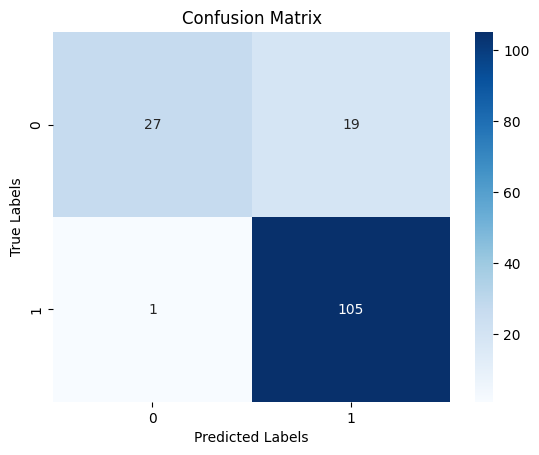

Confusion Matrix:
 [[ 27  19]
 [  1 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.59      0.73        46
           1       0.85      0.99      0.91       106

    accuracy                           0.87       152
   macro avg       0.91      0.79      0.82       152
weighted avg       0.88      0.87      0.86       152



In [23]:
# Assuming you have the predicted labels (y_pred) and true labels (y_test)
# Draw the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test5, y_pred5)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test5, y_pred5)
print("Classification Report:\n", class_report)

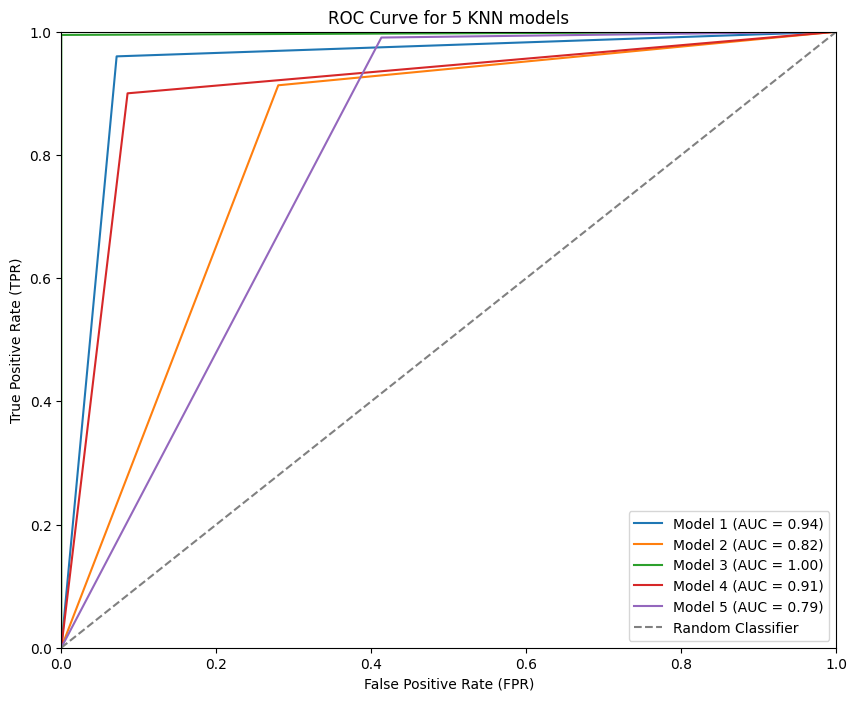

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(y_test1, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test2, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test3, y_pred3)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_test4, y_pred4)
roc_auc4 = auc(fpr4, tpr4)

fpr5, tpr5, _ = roc_curve(y_test5, y_pred5)
roc_auc5 = auc(fpr5, tpr5)

plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'Model 1 (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Model 2 (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'Model 3 (AUC = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'Model 4 (AUC = {roc_auc4:.2f})')
plt.plot(fpr5, tpr5, label=f'Model 5 (AUC = {roc_auc5:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for 5 KNN models')
plt.legend(loc='lower right')
plt.show()
